In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [4]:
df=pd.read_csv('final.csv',index_col=0)

In [5]:
df.head()

,Title,Article,Category
0,Domestic equity benchmarks decline more than 1...,"The domestic equity benchmarks, in the busines...",Business
1,Gold price rise by Rs. 155 rupees at Multi Com...,Gold price today rose by 155 rupees at Multi C...,Business
2,Forex market: Domestic Unit closes at Rs. 82.0...,"In the forex market, the rupee today appreciat...",Business
3,Oil falls for a 4th session today heading for ...,"Oil fell for a fourth session today, heading f...",Business
4,US Market: Wall Street's three major stock ind...,Wall Street's three major stock indices closed...,Business


In [6]:
df.columns

Index(['Title', 'Article', 'Category'], dtype='object')

In [7]:
df.shape

(3636, 3)

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(2805, 3)

In [10]:
df

,Title,Article,Category
0,Domestic equity benchmarks decline more than 1...,"The domestic equity benchmarks, in the busines...",Business
1,Gold price rise by Rs. 155 rupees at Multi Com...,Gold price today rose by 155 rupees at Multi C...,Business
2,Forex market: Domestic Unit closes at Rs. 82.0...,"In the forex market, the rupee today appreciat...",Business
3,Oil falls for a 4th session today heading for ...,"Oil fell for a fourth session today, heading f...",Business
4,US Market: Wall Street's three major stock ind...,Wall Street's three major stock indices closed...,Business
...,...,...,...
3631,Spotify update: What is the new 'Niche Mixes' ...,"To access the Niche Mixes, users will have to ...",Technology
3632,Apple introduces new features with macOS Ventu...,"The release of macOS Ventura 13.3, iOS 16.4, a...",Technology
3633,"Many Twitter Blue users have less than 1,000 f...",Only 0.2 per cent of Twitter's 254 million dai...,Technology
3634,Apple's Make in India for smartphone market re...,"""Apple's EMS partners Foxconn Hon Hai, Wistron...",Technology


In [11]:
for i, row in df.iterrows():
    soup = BeautifulSoup(row['Title'], 'html.parser')
    if soup.find():
        df.drop(i, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3596\2919965825.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(row['Title'], 'html.parser')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3596\2919965825.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(row['Title'], 'html.parser')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3596\2919965825.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(row['Title'], 'html.parser')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3596\2919965825.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file a

In [12]:
df.shape

(2754, 3)

In [13]:
df['Category'].value_counts()

Sports           619
Business         613
Entertainment    561
Politics         515
Technology       445
category           1
Name: Category, dtype: int64

In [14]:
print(df.isnull().sum())

Title          0
Article     1046
Category       0
dtype: int64


In [15]:
df.describe(include='all')


,Title,Article,Category
count,2754,1708,2754
unique,2500,1668,6
top,Hindenburg Research Targets Twitter Co-Founder...,US streaming device maker Roku will lay off 6%...,Sports
freq,4,2,619


In [16]:
df = df[df['Category'] != 'category']


In [17]:
df['Category'].value_counts()

Sports           619
Business         613
Entertainment    561
Politics         515
Technology       445
Name: Category, dtype: int64

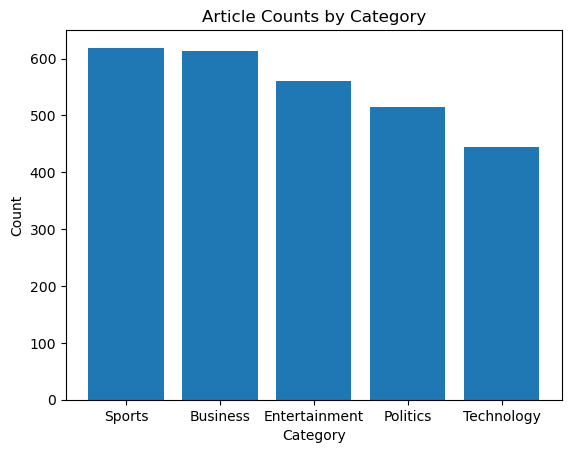

In [18]:
category_counts = df['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Article Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [19]:
plt.hist(df['Article'].apply(len), bins=20)
plt.title('Distribution of Article Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.show()


TypeError: object of type 'float' has no len()

In [20]:
sns.boxplot(x='Category', y=df['Article'].apply(len), data=df)
plt.title('Article Length by Category')
plt.xlabel('Category')
plt.ylabel('Length (characters)')
plt.show()


TypeError: object of type 'float' has no len()

In [21]:
df['Title']=df['Title'].str.strip()
df['Title'] = df['Title'].str.replace('\n', '')
df['Title'] = df['Title'].astype(str).apply(lambda x: re.sub(r"short by (.*)$", " ", x))
df['Article']=df['Article'].str.strip()
df['Article'] = df['Article'].str.replace("\n", "")


C:\Users\Dell\AppData\Local\Temp\ipykernel_3596\3508907234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title']=df['Title'].str.strip()
C:\Users\Dell\AppData\Local\Temp\ipykernel_3596\3508907234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.replace('\n', '')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3596\3508907234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [18]:
df.shape

(4165, 3)

In [19]:
df['Article'] = df['Article'].fillna('')

df['Text']=df['Title']+" "+df['Article']
df['Text']

C:\Users\NIKI\AppData\Local\Temp\ipykernel_4164\2609168350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article'] = df['Article'].fillna('')
C:\Users\NIKI\AppData\Local\Temp\ipykernel_4164\2609168350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text']=df['Title']+" "+df['Article']


0       Domestic equity benchmarks decline more than 1...
1       Gold price rise by Rs. 155 rupees at Multi Com...
2       Forex market: Domestic Unit closes at Rs. 82.0...
3       Oil falls for a 4th session today heading for ...
4       US Market: Wall Street's three major stock ind...
                              ...                        
5590    Mozilla vulnerabilities may let hackers contro...
5591    <div class="news-card-title news-right-box"><a...
5593    Apple Update: 32 and 42-inch OLED displays set...
5594    Google Messages: The auto-organizing categorie...
5595    WhatsApp working on new feature 'channels' for...
Name: Text, Length: 4165, dtype: object

In [20]:
for i in df['Text']:
    print(i)

Domestic equity benchmarks decline more than 1 per cent this week The domestic equity benchmarks, in the business week ended yesterday, declined more than one per cent.
Gold price rise by Rs. 155 rupees at Multi Commodity Exchange for April contracts Gold price today rose by 155 rupees at Multi Commodity Exchange for April contracts.
Forex market: Domestic Unit closes at Rs. 82.02 against US dollar In the forex market, the rupee today appreciated four paise against the US dollar.
Oil falls for a 4th session today heading for its biggest weekly loss in 5 weeks Oil fell for a fourth session today, heading for its biggest weekly loss in five week
US Market: Wall Street's three major stock indices close lower, with bank stocks creating biggest drag Wall Street's three major stock indices closed lower yesterday, with bank stocks creating the biggest drag.
Asian & European stocks fall after sell-off in US Bank shares Asian and European stocks fell today after sell-off in US Bank shares.
Time

In [21]:
df.to_csv('cleaned.csv')

In [22]:
target_category = df['Category'].unique()
print(target_category)

['Business' 'Entertainment' 'Politics' 'Sports' 'Technology']


In [23]:
stop_words = set(stopwords.words('english'))
new_stop_words = ["said","india"]
stop_words.update(new_stop_words)
# function to remove stopwords from a string
def remove_stopwords(text):
    filtered_words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# apply the function to the 'text' column of the dataframe
#df['text'] = df['text'].apply(remove_stopwords)

In [24]:
special_chars_pattern = r'[^a-zA-Z0-9\s]'
def remove_special_chars(text):
    return re.sub(special_chars_pattern, '', text)

In [25]:
def convert_lower(text):
    return text.lower()

In [26]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [27]:

def wordcloud_draw(dataset):

    wordcloud = WordCloud(stopwords = stop_words,background_color = 'white',width = 2500, height = 2500).generate(' '.join(dataset))
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [28]:
df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'] = df['Text'].apply(remove_special_chars)
df['Text'] = df['Text'].apply(convert_lower)
df['Text'] = df['Text'].apply(lemmatize_words)


C:\Users\NIKI\AppData\Local\Temp\ipykernel_4164\1899369810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(remove_stopwords)
C:\Users\NIKI\AppData\Local\Temp\ipykernel_4164\1899369810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(remove_special_chars)
C:\Users\NIKI\AppData\Local\Temp\ipykernel_4164\1899369810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

business related words:


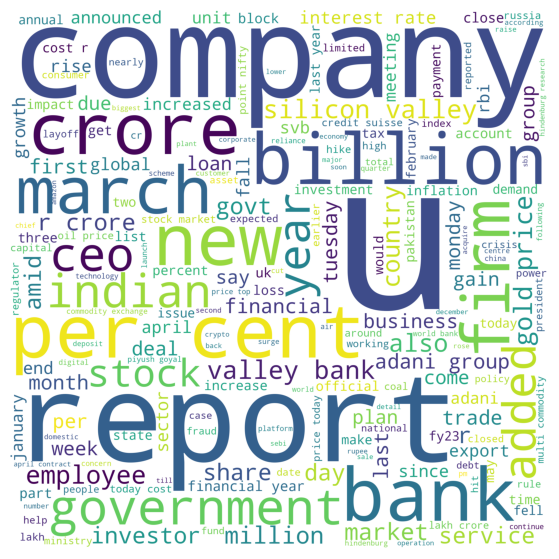

In [29]:
business = df[df['Category'] == 'Business']
business = business['Text']
print("business related words:")

wordcloud_draw(business)

Technology related words:


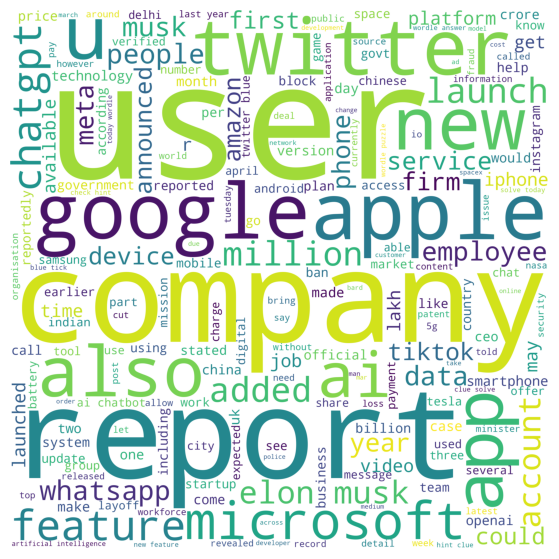

In [30]:
tech = df[df['Category'] == 'Technology']
tech = tech['Text']

print("Technology related words:")

wordcloud_draw(tech)

Sports related words:


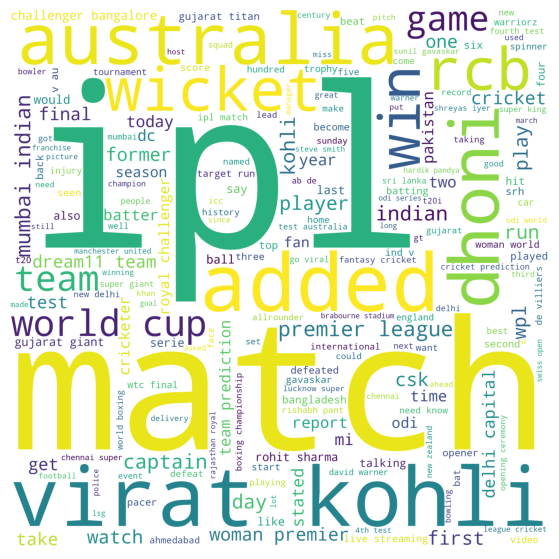

In [31]:
sports = df[df['Category'] == 'Sports']
sports = sports['Text']

print("Sports related words:")

wordcloud_draw(sports)

Entertainment related words:


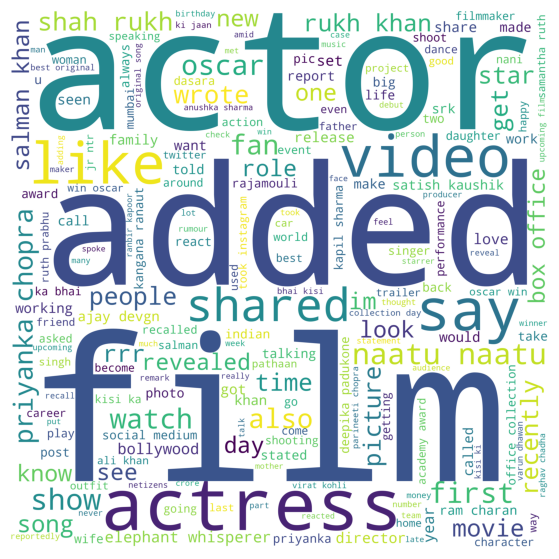

In [32]:
entertainment = df[df['Category'] == 'Entertainment']
entertainment = entertainment['Text']

print("Entertainment related words:")

wordcloud_draw(entertainment)

In [41]:
df.head(10)

,Title,Article,Category,Text
0,Domestic equity benchmarks decline more than 1...,"The domestic equity benchmarks, in the busines...",Business,domestic equity benchmark decline 1 per cent w...
1,Gold price rise by Rs. 155 rupees at Multi Com...,Gold price today rose by 155 rupees at Multi C...,Business,gold price rise r 155 rupee multi commodity ex...
2,Forex market: Domestic Unit closes at Rs. 82.0...,"In the forex market, the rupee today appreciat...",Business,forex market domestic unit close r 8202 u doll...
3,Oil falls for a 4th session today heading for ...,"Oil fell for a fourth session today, heading f...",Business,oil fall 4th session today heading biggest wee...
4,US Market: Wall Street's three major stock ind...,Wall Street's three major stock indices closed...,Business,u market wall street three major stock index c...
5,Asian & European stocks fall after sell-off in...,Asian and European stocks fell today after sel...,Business,asian european stock fall selloff u bank share...
6,Time for Indian products to be the best in qua...,The Union Minister for Commerce and Industry P...,Business,time indian product best quality world piyush ...
7,Gold price rises marginally by Rs 89 at Multi ...,Gold price on Thursday rose marginally by 89 r...,Business,gold price rise marginally r 89 multi commodit...
8,Govt says trade in crypto currency to be cover...,The government has said that Prevention of Mon...,Business,govt say trade crypto currency covered india m...
9,"Centre directs NAFED, NCCF for immediate inter...",Centre has directed National Agricultural Coop...,Business,centre directs nafed nccf immediate interventi...


In [33]:
#declare dependent and independent value

x = df['Text']
y = df['Category']

In [34]:
#Create and Fit Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df.Text.values)
y = np.array(df.Category.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (4165, 5000)
y.shape =  (4165,)


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

2915
1250


In [36]:
#create list of model and accuracy dicts
perform_list = [ ]
def run_model(model_name, est_c, est_pnlty):
    mdl=''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))



In [37]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Logistic Regression: % 78.32
Precision : 0.7832
Recall : 0.7832
F1-score : 0.7832


In [38]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 78.8
Precision : 0.788
Recall : 0.788
F1-score : 0.788


In [39]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 81.52
Precision : 0.8152
Recall : 0.8152
F1-score : 0.8152


In [40]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 79.92
Precision : 0.7992
Recall : 0.7992
F1-score : 0.7992


In [42]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 65.6
Precision : 0.656
Recall : 0.656
F1-score : 0.656


In [43]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 57.84
Precision : 0.5784
Recall : 0.5784
F1-score : 0.5784


In [44]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 64.4
Precision : 0.644
Recall : 0.644
F1-score : 0.644


In [51]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,78.32,0.78,0.78,0.78
1,Random Forest,78.80,0.79,0.79,0.79
2,Multinomial Naive Bayes,81.52,0.82,0.82,0.82
3,Support Vector Classifer,79.92,0.80,0.80,0.80
4,Decision Tree Classifier,65.60,0.66,0.66,0.66
5,K Nearest Neighbour,57.84,0.58,0.58,0.58
6,Gaussian Naive Bayes,64.40,0.64,0.64,0.64


In [52]:
classifier = GaussianNB();
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [53]:
y_pred1 = cv.transform(['Captains pose with IPL 2023 trophy at Narendra Modi Stadium, Rohit Sharma missing']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Sports']


In [54]:
y_pred1 = cv.transform(['Which players have been ruled out of IPL 2023 that will begin tomorrow?']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Sports']


In [55]:
y_pred1 = cv.transform(['Bard not trained using ChatGPT: Google on claims it copied OpenAI']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Technology']


In [56]:
y_pred1 = cv.transform(['Makers of Prabhas Adipurush unveil new poster on Ram Navami']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Technology']


In [60]:
y_pred1 = cv.transform(['Ex-Haryana CM Bhupinder Hooda joins wrestlers protest in Delhi']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Sports']
